<a href="https://colab.research.google.com/github/darioblandon/Curso1/blob/main/S8/S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 9

- <a href="#met">1. Métricas de Clasificación</a><br>
  - <a href="#met1">1.1. Tipos de error </a><br>
  - <a href="#met2">1.2. Datos no balanceados </a><br>
  - <a href="#met3">1.3. Matriz de confusión </a><br>
  - <a href="#met4">1.4. Precisión y exhaustividad  </a><br>
  - <a href="#met5">1.5. Estimación de incertidumbre en clasificadores </a><br>
- <a href="#knn">2. Algoritmo de knn</a><br>



<p><a name="met"></a></p>

# 1. Métricas de evaluación y puntajes

Si evaluamos el rendimiento de un modelo de clasificación utilizando solo la *accuracy* (la fracción de muestras clasificadas correctamente) veremos que, en la práctica, esta métrica de evaluación puede no ser apropiada para el objetivo que se tenga. Es importante elegir la métrica correcta para seleccionar entre diferentes modelos.

Al seleccionar una métrica, siempre debe tener en mente el objetivo final de la aplicación de ML. **¡Mantenga el objetivo final en mente!**. En la práctica, generalmente estamos interesados no solo en hacer predicciones precisas, sino en usar estas predicciones como parte de un proceso de toma de decisiones más amplio.

La clasificación binaria es posiblemente la aplicación más común y conceptualmente simple del aprendizaje automático en la práctica. Antes de ver las métricas alternativas, echemos un vistazo a las formas en que la precisión de medición puede ser engañosa. Recuerde que para la clasificación binaria, a menudo hablamos de una clase positiva y una clase negativa, entendiendo que la clase positiva es la que estamos buscando.

<p><a name="met1"></a></p>

### 1.1. Tipos de error:

Imaginemos una aplicación para detectar de forma temprana el cáncer mediante una prueba automatizada. Si la prueba es negativa, se supondrá que el paciente está sano, mientras que si la prueba es positiva, el paciente se someterá a una evaluación adicional. Aquí, llamaremos a una prueba positiva (una indicación de cáncer) la clase positiva, y una prueba negativa a la clase negativa. No podemos suponer que nuestro modelo siempre funcionará perfectamente; este cometerá errores. Para cualquier aplicación, debemos preguntarnos cuáles son las consecuencias de estos errores en el mundo real.

Un posible error es que un paciente sano se clasifique como positivo, lo que llevaría a pruebas adicionales. Esto conlleva algunos costos y un inconveniente para el paciente. Una predicción positiva incorrecta se llama **falso positivo**. El otro posible error es que un paciente enfermo se clasifique como negativo, por lo que no recibirá más pruebas ni tratamiento. El cáncer no diagnosticado podría conducir a problemas de salud graves e incluso podría ser fatal. Un error de este tipo (una predicción negativa incorrecta) se llama **falso negativo**.



<p><a name="met1"></a></p>

### 1.2. Datos no balanceados

Los conjuntos de datos en los que una clase es mucho más frecuente que la otra a menudo se denominan conjuntos de datos no balanceados. En realidad, los datos no balanceados son la norma, y es raro que los eventos de interés tengan una frecuencia igual o incluso similar en los datos.

Para ilustrar, crearemos un conjunto de datos desequilibrado 9:1 a partir del conjunto de datos [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), clasificando el dígito 9 contra las otras nueve clases:

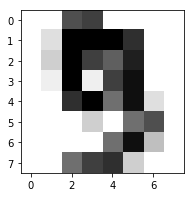

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#cargamos el dataset y separamoslos datos de entrenamiento y la variable objetivo
digits = load_digits()

X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#mostramos el dígito 9
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Podemos usar [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) para predecir siempre la clase mayoritaria ("no nueve") para ver cuál desinformativa puede ser la *accuracy*:

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Etiqueta predicha única: {}".format(np.unique(pred_most_frequent)))
print("Puntaje: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Etiqueta predicha única: [False]
Puntaje: 0.90


Comparemos esto con el uso de un clasificador real

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma="auto").fit(X_train,y_train)

pred_svm = svm.predict(X_test)

print("Puntaje: {:.2f}".format(svm.score(X_test, y_test)))

Puntaje: 0.90


En ambos casos obtenemos el mismo resultado. Esto podría indicar que algo está mal con la forma en que usamos SVC, o que la accuracy de hecho no es una buena medida. Evaluemos con otro modelo y esta vez, utilicemos el DummyClassifier de manera que produzca una salida aleatoria.

In [ ]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Puntaje Dummy: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, solver="liblinear").fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Puntaje LogReg: {:.2f}".format(logreg.score(X_test, y_test)))

Puntaje Dummy: 0.83
Puntaje LogReg: 0.98


El clasificador Dummy es claramente el peor (según la accuracy), mientras que LogisticRegression produce muy buenos resultados. Sin embargo, incluso el clasificador aleatorio produce más del 80% de precisión. Esto hace que sea muy difícil juzgar cuál de estos resultados es realmente útil. El problema aquí es que la accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en este escenario no balanceado, por lo que necesitamos métricas alternativas.

<p><a name="met3"></a></p>

### 1.3. Matriz de confusión

Una de las formas más completas de representar el resultado de evaluar la clasificación binaria es usar matrices de confusión. Inspeccionemos las predicciones de LogisticRegression de la sección anterior usando la función `confusion_matrix`. Ya almacenamos las predicciones sobre el conjunto de prueba en `pred_logreg`:

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


La salida de confusion_matrix es una matriz de dos por dos, donde las filas corresponden a las clases verdaderas y las columnas corresponden a las clases predichas. Cada entrada cuenta con qué frecuencia una muestra que pertenece a la clase correspondiente a la fila (aquí, "no nueve" y "nueve") se clasificó como la clase correspondiente a la columna

In [ ]:
!pip install mglearn;

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=edbc542034522938f0d839f65283a7db8ca4822c38e9bc6127c018cb85396896
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


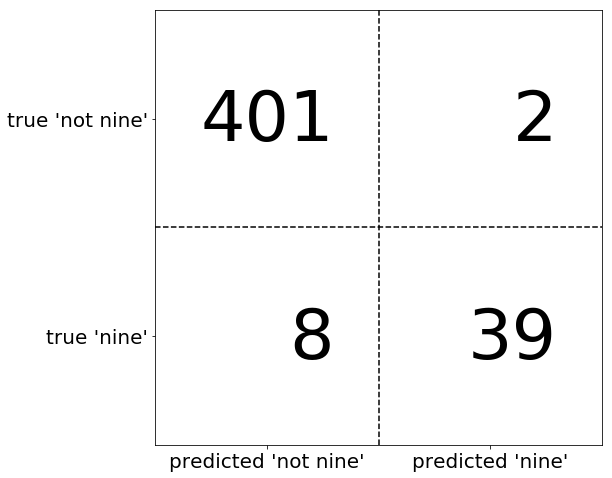

In [ ]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

Las entradas en la diagonal principal de la matriz de confusión corresponden a las clasificaciones correctas, mientras que otras entradas nos dicen cuántas muestras de una clase se clasificaron erróneamente como otra clase.

Si declaramos "un nueve" como la clase positiva, podemos relacionar las entradas de la matriz de confusión con los términos falso positivo y falso negativo que presentamos anteriormente. Llamamos a las muestras clasificadas correctamente que pertenecen a los positivos verdaderos de clase positiva y a las muestras clasificadas correctamente que pertenecen a los negativos verdaderos de clase negativa. Estos términos generalmente se abrevian FP, FN, TP y TN y conducen a la siguiente interpretación para la matriz de confusión

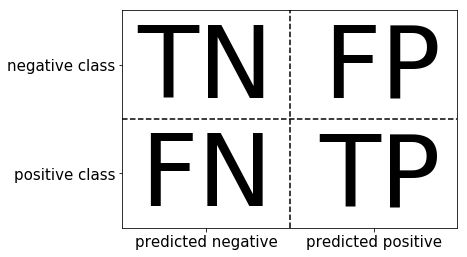

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

Ahora usemos la matriz de confusión para comparar los modelos que ajustamos anteriormente

In [ ]:
print("Clase más frecuente:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nmodelo Dummy:")
print(confusion_matrix(y_test, pred_dummy))
print("\nSVM:")
print(confusion_matrix(y_test, pred_svm))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Clase más frecuente:
[[403   0]
 [ 47   0]]

modelo Dummy:
[[345  58]
 [ 42   5]]

SVM:
[[403   0]
 [ 47   0]]

Logistic Regression
[[401   2]
 [  8  39]]


Mirando la matriz de confusión, es bastante claro que algo está mal con `pred_most_frequent` y `SVM`, porque siempre predicen la misma clase. `pred_dummy`, por otro lado, tiene un número muy pequeño de positivos verdaderos(5), particularmente en comparación con el número de falsos negativos y falsos positivos: hay muchos más falsos negativos que verdaderos negativos. Vemos que solo LR tiene un mejor rendimiento en todos los aspectos: tiene más positivos verdaderos y negativos verdaderos mientras que tiene menos falsos positivos y falsos negativos.

<p><a name="met4"></a></p>

### 1.4. Precisión, exhaustividad y exactitud

inspeccionar la matriz de confusión total es un poco engorroso, y aunque obtuvimos mucha información al observar todos los aspectos de la matriz, el proceso fue muy manual y cualitativo. Hay varias otras formas de resumir la matriz de confusión, siendo las más comunes la **precisión** y la **exhaustividad**. La precisión mide cuántas de las muestras predichas como positivas son realmente positivas:

$$\text{Precisión} = \frac{TP}{TP + FP}$$

La **precisión** se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos. 

La **exhaustividad**, por otro lado, mide cuántas de las muestras positivas son capturadas por las predicciones positivas:

$$\text{Exhaustividad} = \frac{TP}{TP + FN}$$

La exhaustividad se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.

Con frecuencia hay tensión entre precisión y exhaustividad. Esto quiere decir que, al mejorar la precisión, generalmente se reduce la exhaustividad, y viceversa. Por lo tanto, si bien la precisión y la exhaustividad son medidas muy importantes, mirar solo una de ellas no proporcionará una imagen completa del problema. Una forma de resumirlos es el *puntaje f* o la *medida f*, que es la media armónica entre precisión y exhaustividad.

$$f = 2  \frac{\text{Precisión}*\text{Exhaustividad}}{\text{Precisión}+\text{Exhaustividad}}$$

Como tiene en cuenta la precisión y la exhaustividad, puede ser una mejor medida que la *accuracy* en los conjuntos de datos de clasificación binaria no balanceados. Vamos a evaluarlo en las predicciones para el conjunto de datos "nueve vs. resto" que calculamos anteriormente. Aquí, asumiremos que la clase "nueve" es la clase positiva (está etiquetada como Verdadera mientras que el resto está etiquetada como Falsa), por lo que la clase positiva es la clase minoritaria

La **exactitud** mide que tan bien realiza la predicción correcta un clasificador. Este valor corresponde a la razón entre el número de predicciones correctas respecto al número total de predicciones:

\begin{equation}
\text{Accuracy/Exactitud} = \frac{TP+TN}{TP+FP+TN+FN}
\end{equation}

In [ ]:
from sklearn.metrics import f1_score

print("f most_frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f svm: {:.2f}".format(f1_score(y_test, pred_svm)))
print("f LG: {:.2f}".format(f1_score(y_test, pred_logreg)))

f most frequent: 0.00
f dummy: 0.09
f svm: 0.00
f LG: 0.89


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Podemos ver una distinción bastante fuerte entre las predicciones para dummy y para LG, que no estaba tan clara cuando se observaba solo la *accuracy*. Usando el puntaje f para la evaluación, resumimos nuevamente el rendimiento predictivo en un número. Sin embargo, el puntaje f parece capturar nuestra intuición de lo que es un buen modelo mucho mejor que la *accuracy*.

Si queremos un resumen más completo de precisión, exhaustividad y puntaje f, podemos usar la función `clasificación_report` para calcular los tres a la vez 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


La función `clasificación_report` produce una línea por clase (aquí, Verdadero y Falso) e informa precisión, exhaustividad y puntaje f con esta clase como clase positiva. Antes, asumíamos que la clase minoritaria "nueve" era la clase positiva. Si cambiamos la clase positiva a "no nueve", podemos ver a partir del resultado del informe de clasificación que obtenemos una puntuación f de 0,94 con el modelo most_frequent. Además, para la clase "no nueve" tenemos una exhaustividad de 1, ya que clasificamos todas las muestras como "no nueve". La última columna junto al puntaje f proporciona el soporte de cada clase, lo que simplemente significa el número de muestras en esta clase.


In [ ]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.89      0.86      0.87       403
        nine       0.08      0.11      0.09        47

    accuracy                           0.78       450
   macro avg       0.49      0.48      0.48       450
weighted avg       0.81      0.78      0.79       450



In [ ]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



Como podemos observar al mirar los informes, las diferencias entre los modelos ficticios y un modelo muy bueno ya no son tan claras. Elegir qué clase se declara la clase positiva tiene un gran impacto en las métricas. Mientras que el puntaje f para la clasificación ficticia es 0.09 (vs. 0.89 para la regresión logística) en la clase "nueve", para la clase "no nueve" es 0.90 vs. 0.99, que parecen resultados razonables. Sin embargo, al mirar todos los números juntos obtenemos una imagen bastante precisa de los resultados, y podemos ver claramente la superioridad del modelo de regresión logística

<p><a name="met5"></a></p>

### 1.5. Estimación de incertidumbre en clasificadores

Otra parte útil de la interfaz scikit-learn de la que aún no hemos hablado es la capacidad de los clasificadores para proporcionar estimaciones de incertidumbre de las predicciones. A menudo, no solo estamos interesados en qué clase predice un clasificador para un determinado punto de prueba, sino también en la certeza de que esta es la clase correcta. Hay dos funciones diferentes en scikit-learn que se pueden usar para obtener estimaciones de incertidumbre de los clasificadores: `decision_function` y `predict_proba`.

En el caso de clasificación binaria, `decision_function` es de la forma `(n_instancias,)`. Devuelve una puntuación para cada instancia y luego realiza predicciones basadas en esas puntuaciones utilizando cualquier umbral deseado:

In [ ]:
print("Forma del conjunto de prueba:", X_test.shape)
print("forma de la funcion de decisión:", logreg.decision_function(X_test).shape )

Forma del conjunto de prueba: (450, 64)
forma de la funcion de decisión: (450,)


In [ ]:
#mostrar las primeras 10 entradas de la funcion de decision
print("Función de decisión:\n{}".format(logreg.decision_function(X_test)[:10]))

Función de decisión:
[-15.95969695 -11.69938255 -17.16641724 -32.6168925  -21.54064974
  -8.64950262 -22.031057     3.23049152 -12.0037343   -9.92962891]


Este valor codifica cuán fuertemente el modelo cree que un punto de datos pertenece a la clase "positiva". Los valores positivos indican una preferencia por la clase positiva, y los valores negativos indican una preferencia por la "negativa" (otra) clase. Podemos recuperar la predicción mirando solo el signo de la función de decisión

In [ ]:
print("Función de decisión:\n{}".format((logreg.decision_function(X_test) > 0)[0:10]))
print("Predicciones:\n{}".format(logreg.predict(X_test)[0:10]))

Función de decisión:
[False False False False False False False  True False False]
Predicciones:
[False False False False False False False  True False False]


El hacer predicciones puede verse como fijar el umbral para la salida de la función de decisión en un cierto punto fijo. En clasificación binaria usamos 0 (y 0.5 para `predict_proba`)

El siguiente es un ejemplo de una tarea de clasificación binaria no balanceada, con 400 puntos en la clase negativa clasificada contra 50 puntos en la clase positiva. 

In [ ]:
from sklearn.datasets import *

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Para la clase 1, obtenemos una exhaustividad bastante pequeña. Debido a que la clase 0 es mucho más grande, el clasificador se enfoca en hacer que la clase 0 sea correcta, y no en la clase 1 más pequeña.

Supongamos que en nuestra aplicación es más importante tener una alta exhaustividad alta para la clase 1. Esto significa que estamos dispuestos a arriesgar más falsos positivos (clase 1 falsa) a cambio de más positivos verdaderos (lo que aumentará la exhaustividad). Por defecto, los puntos con un valor de función de decisión mayor que 0 se clasificarán como clase 1. Queremos que se clasifiquen más puntos como clase 1, por lo que debemos disminuir el umbral:


In [ ]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



Como se esperaba, la exhaustividad de la clase 1 aumentó y la precisión disminuyó

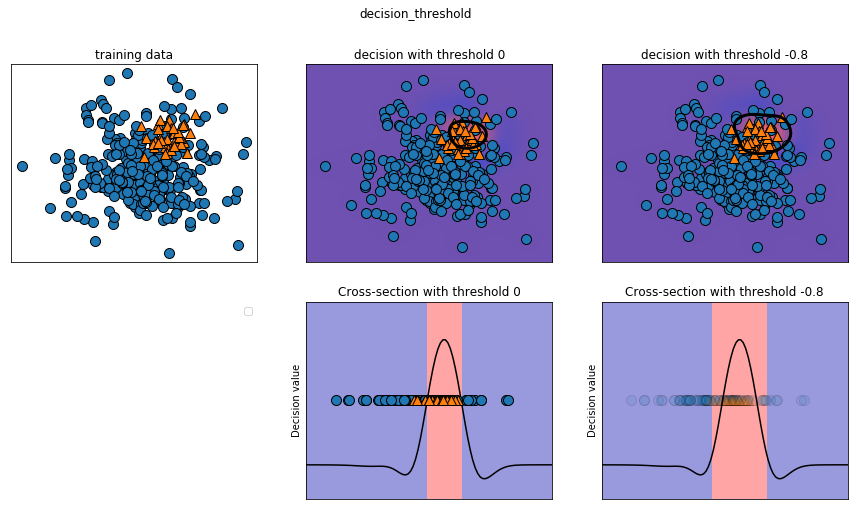

In [ ]:
mglearn.plots.plot_decision_threshold()

Si se valora la precisión sobre la exhaustividad o al revés, o los datos están muy desequilibrados, cambiar el umbral de decisión es la forma más fácil de obtener mejores resultados. Como la función de decisión puede tener rangos arbitrarios, es difícil proporcionar una regla general sobre cómo elegir un umbral.

<p><a name="knn"></a></p>

# 2. Vecinos más cercanos - knn.

[[Contenidos]](#contents)

El algoritmo de k-NN es, sin lugar a dudaaras, el algoritmo más simple de ML. El modelo consiste solo en el almacenamiento en memoria de los datos de entrenamiento. Mediante este algoritmo, la clase de una instacia se predice al buscar dentro de los datos los vecinos más cercanos a la instacia.

**Clasificación en k-NN**

La forma más sencilla de k-NN consiste en la busqueda del vecino más cercano a una instancia nueva, cuya clase queremos predecir. La predicción corresponderá entonces a la clase del dato de entrenamiento más cercano a la nueva instancia. En la siguiente figura se ilustra este caso de clasificación en unos datos de entrenamiento genérico. Las instancias nuevas, se representan mediate estrellas y color representa la clase, deducida del vecino más cercano. Cada instancia nueva se asocia con el vecino más cercano mediante una linea que los conecta. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# install mglear (Book introduction to machine learnig with python)
!pip install mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


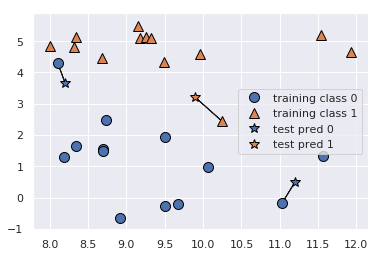

In [ ]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1);

En lugar de considerar solo un vecino, podemos considerar un número arbitrario de k vecinos (de ahí el nombre del algoritmo k-NN). Cuando se considera más de un vecino, la clase se deduce como un "sistema de votación", es decir, se cuenta cuantos vecinos pertenecen a una clase u otra y se clasifica la nueva instancia como perteneciente a la clase más frecuente del conteo; en otras palabras, estamos escogiendo la clase mayoritaria entre los k vecinos más cercanos. En la siguiente figura se ilustra el proceso para varios vecinos de las nuevas instancias:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


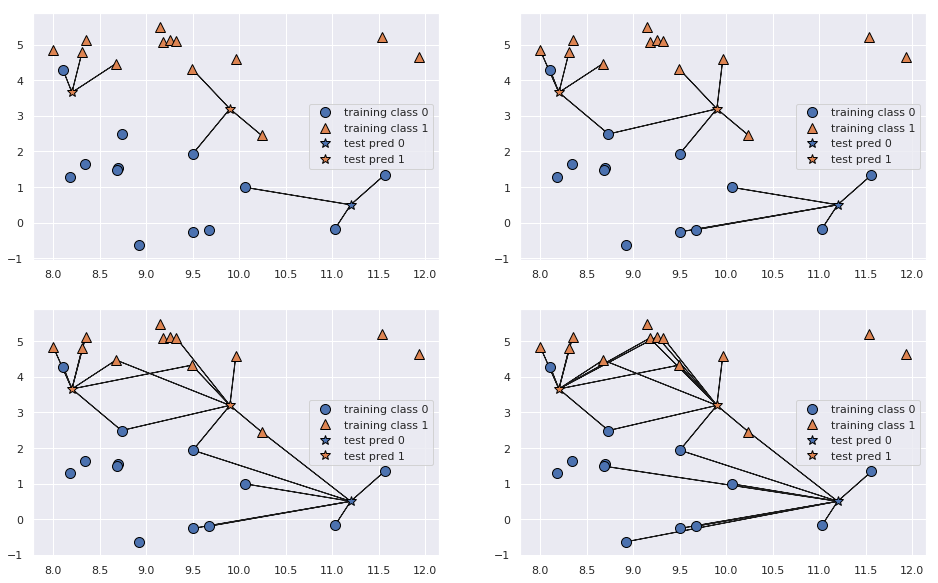

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(221)
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.subplot(222)
mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.subplot(223)
mglearn.plots.plot_knn_classification(n_neighbors=7)
plt.subplot(224)
mglearn.plots.plot_knn_classification(n_neighbors=9);

Nuevamente, las predicciones se muesta como el color de la estrella. Puede observarse, en relación al caso de un vecino más cercano, como la predicción de la clase a la que pertenece la instancia puede cambiar (estrella de la esquina izquierda).

Anque este ejemplo se trata de una **clasificación binaria**, este método puede aplicarse en bases de datos multiclases. En el caso de varias clases, se cuenta el numero de vecinos perteneciente a una clase y, nuevamente, se escoge la clase más común.

Veamos ahora como aplicar el algoritmo de k-NN mediante la librería de `scikit-learn`. En  primer lugar, dividamos nuestros datos en datos de entrenamiento y test:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Vemos la apariencia que tiene este dataset:

In [ ]:
data_set = np.concatenate([X,y.reshape(-1,1)],axis=1);
data_set

array([[ 9.96,  4.6 ,  1.  ],
       [11.03, -0.17,  0.  ],
       [11.54,  5.21,  1.  ],
       [ 8.69,  1.54,  0.  ],
       [ 8.11,  4.29,  0.  ],
       [ 8.31,  4.81,  1.  ],
       [11.93,  4.65,  1.  ],
       [ 9.67, -0.2 ,  0.  ],
       [ 8.35,  5.13,  1.  ],
       [ 8.67,  4.48,  1.  ],
       [ 9.18,  5.09,  1.  ],
       [10.24,  2.46,  1.  ],
       [ 8.69,  1.49,  0.  ],
       [ 8.92, -0.64,  0.  ],
       [ 9.49,  4.33,  1.  ],
       [ 9.26,  5.13,  1.  ],
       [ 8.  ,  4.85,  1.  ],
       [ 8.18,  1.3 ,  0.  ],
       [ 8.73,  2.49,  0.  ],
       [ 9.32,  5.1 ,  1.  ],
       [10.06,  0.99,  0.  ],
       [ 9.5 , -0.26,  0.  ],
       [ 8.34,  1.64,  0.  ],
       [ 9.5 ,  1.94,  0.  ],
       [ 9.15,  5.5 ,  1.  ],
       [11.56,  1.34,  0.  ]])

Gráficamente tenemos:

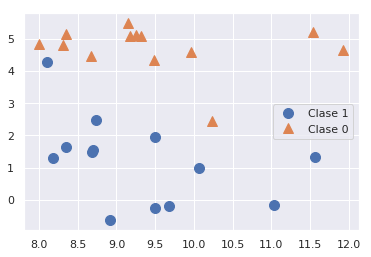

In [ ]:
plt.plot(data_set[np.where(data_set[:,2] == 0)][:,0],data_set[np.where(data_set[:,2] == 0)][:,1],'o',markersize=10, label='Clase 1')
plt.plot(data_set[np.where(data_set[:,2] == 1)][:,0],data_set[np.where(data_set[:,2] == 1)][:,1],'^',markersize=10, label='Clase 0')
plt.legend(loc='center right')

Como paso siguiente, importamos e instanciamos la clase. En este punto, podemos estabecer los parámetros, como, por ejemplo, el número de vecinos, el cual estableceremos en tres.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Ajuestemos ahora el clasificafor usando el conjunto de entrenamiento. Para el el `KNeighborsClassifier` esto implica el almacenamiento de los datos, de tal forma que pueda calcularse los vecinos más cercanos usados en la predicción de las clases de las instancias:

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Para hacer las predicciones en el conjunto de evaluación, empleamos el método `predict`. Este método calculará para cada data en el conjunto de evaluación los vecinos mas cercanos en el conjunto de entrenamiento, y determinar así, la clase más común entre ellos:

In [ ]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Para evaluar el desempeño de nuestro modelo, usamos el método `score` con los datos de entrenamiento y evaluación:

In [ ]:
print("Test set accuracy of train data: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy of test data: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy of train data: 0.95
Test set accuracy of test data: 0.86


Vemos entonces que nuestro modelo presenta un 86% de presición, es decir, que predice correctamente un 86% de los datos de evaluación. En el caso de los datos de entrenamiento, el desempeño es ligeramente mayor.

## Analisis del clasificador `KNeighborsClassifier`

Para datasets bidimensionales, se puede ilustrar la predicción para todos los posibles puntos de evaluación en el plano $xy$. En la siguiente figura se ilustra el plano dividido en las regiones de acuerdo con las clases que son asignadas para tres casos de números de vecinos, a saber, 1, 3 y 9. En esta figura se ilustrata también la frontera de decisión.

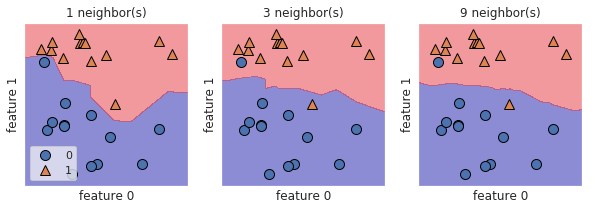

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

En la figura de la **izquierda** puede observarse que cuando se usa un solo vecino para la predicción de las clases de nuevas instancias, la frontera de desición se sobreajusta a los datos. Por el contrario, entre más vecinos escojamos, la frontera se suaviza. Una **frontera de desición suave**. En otras palabras, el uso de **pocos** vecinos resulta en **complejidades mayores** de los modelos y el uso de **muchos** vecinos resulta en **complejidades menores**. En el caso extremo en que consideramos el número de vecinos igual al número de datos de la muestra, cada instancia nueva tendrá el mismo número de vecinos (toda la muestra) y la predicción será siempre la misma: la clase mas frecuente.

Veamos entonces si podemos encontrar una conexión entre la complejidad del modelo y una mayor generalización del mismo, como se señala en el párrafo anterior. 

Realicemos esto en un dataset de pacientes con cáncer de seno, extaido de los dataset de `sklearn`:

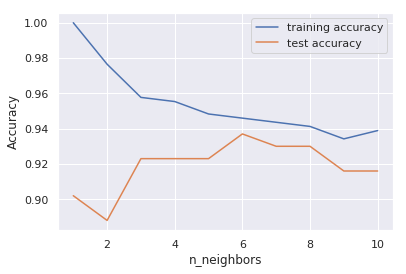

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

En la gráfica podemos ver la precisión obtenida por el modelo en los casos del conjunto de entrenamiento y evaluación en función del número de vecinos escogidos para crear el modelo. De esta gráfica podemos ver varias características de **sobreajuste** y **subajuste**. Cuando considereamos un solo vecino, la predicción en el conjunto de entrenamiento es perfecta. Cuando agregamos más vecinos, el modelo se torna más simple y la precisión decrese. Como se vio en la clase pasada, la **precisión** en el conjunto de **evaluación** es menor cuando la **complejidad** del modélo es **mayor**, es decir, cuando usamos un solo vecino para crearlo. En contraposición, cuando usamos 10 vecinos, el modelo es muy simple y su desempeño emperora. El mejor desempeño se alcanza alrededor de los 6 vecinos. 

### Ejercicio 1:

Utilice el método `validation_curve` del módulo `model_selection` de sklearn para gráficar una curva de validación del los puntajes de los datos de entrenamiento y evaluación en función del número de vecinos usados para la construcción del modelo


In [4]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [9]:
X=cancer.data
y=cancer.target

In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,10)
clf=KNeighborsClassifier()

In [20]:
train_score,val_score=validation_curve(clf, X, y,param_name="n_neighbors",param_range=neighbors, cv=7)

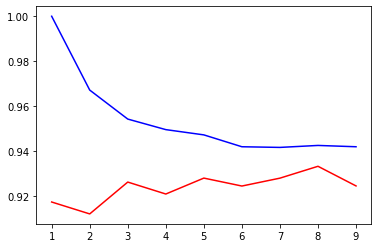

In [25]:
import matplotlib.pyplot as plt

plt.plot(neighbors,np.mean(train_score,1),color='blue')
plt.plot(neighbors,np.mean(val_score,1),color='red')

### Ejercicio 2:

Una empresa de telecomunicaciones ha categorizado sus usuarios basados en patrones del uso de servicios, categorizándolos en cuatro grupos. Si los datos demográficos pueden ser usados para predecir la pertenenia a uno de esos grupos, la compañia puede optimizar las ofertas de forma personalizada. Este problema consiste en un problema de clasificación supervisada, es decir, dado un dataset con etiquetas predefinidas, se busca construir un modelo para predecir la clase de un nuevo usuario desconocido.

El presente problema se enfoca en el uso de datos demográficos como región, edad, estado civil, etc, con el fin de predecir patrones de uso de servicios de la compañia.

La variable objetivo, o variable dependiente tiene cuatro valores posibles:

1. Basic Service.
2. E-Service.
3. Plus Service.
4. Total Service.

Para realizar el problema de clasificación mediante el algoritmo de k-NN, siga los pasos enumerados a continuación:


1.  Cargue la base de datos de la dirección url https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv en un dataframe de pandas y visualícela. Esta base de datos  corresponde a una base 
2. Obtenga un valor de cuantas instacias tiene por clase.
3. Defina un variable X como un array de numpy con las características ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']. En una variable y, guarde en un array las variables objetivo 'custcat'.
4. Estandarice los datos de las características mendiante el método de `StandarScaler` del módulo `preprocessing` de `sklearn`. Asegurese antes que los datos sean de tipo `float`.
5. Divida los datos en dos conjuntos de entrenamiento y evaluación, usando un 20% para evaluación y visualice la cantidad de datos en cada grupo.
6. Del módulo `neighbors` de `sklearn` importe `KNeighborsClassifier` para crear un modelo de 4 vecinos para realizar la predicción.
7. Mediante el método `predict`, calcule las predicciones realizada por el modelo y guardelas en una variable 'y_hat'.
8. Importe el módulo de métricas de `sklearn` para medir el desempeño (`accuracy_score`) de su modelo.
9. Realice una matriz de confusión para visualizar mejor el desempeño de su modelo.



In [29]:
import pandas as pd

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv ')
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [30]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [37]:
X=df[['region', 'tenure', 'age','marital','address','income','ed','employ', 'retire', 'gender', 'reside']]
y=df['custcat']

In [39]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))
y=df['custcat'].values

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)

In [41]:
K=4
neigh=KNeighborsClassifier(n_neighbors=K).fit(X_train,y_train)


In [42]:
yhat=neigh.predict(X_test)

In [43]:
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [45]:
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.32

In [46]:
metrics.accuracy_score(y_train,neigh.predict(X_train))

0.5475

Text(33.0, 0.5, 'True')

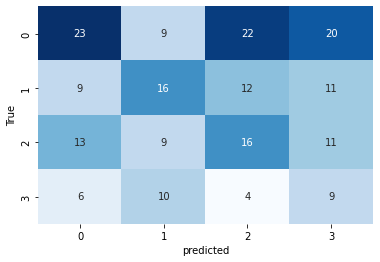

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat=confusion_matrix(y_test,yhat)

sns.heatmap(mat.T, annot=True, cbar=False, cmap="Blues")

plt.xlabel('predicted')
plt.ylabel('True')